In [69]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [70]:
# Load sleep_data set into pandas
sleep_data = pd.read_csv("resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [71]:
# No Null Values
# Identify types
sleep_data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [72]:
# Physical Activity Section

In [73]:
# The average Physical Activity Level, sleep duration, and sleep quality for the sample
average_activity = sleep_data["Physical Activity Level"].mean()
average_sleep_duration = sleep_data["Sleep Duration"].mean()
average_sleep_quality = sleep_data["Quality of Sleep"].mean()

print(average_activity, average_sleep_duration, average_sleep_quality)

59.17112299465241 7.132085561497325 7.31283422459893


In [74]:
# The average Physical Activity Level, sleep duration, and sleep quality per Gender
per_gender_activity = sleep_data.groupby(["Gender"])["Physical Activity Level"].mean()
per_gender_duration = sleep_data.groupby(["Gender"])["Sleep Duration"].mean()
per_gender_quality = sleep_data.groupby(["Gender"])["Quality of Sleep"].mean()

# create data frames for each variable
pd.DataFrame(per_gender_activity)
pd.DataFrame(per_gender_duration)
pd.DataFrame(per_gender_quality)

# merge data frames
gender_averages_df = pd.merge(per_gender_quality, per_gender_duration, on="Gender")
gender_averages_df = pd.merge(gender_averages_df, per_gender_activity, on="Gender")
gender_averages_df

,Quality of Sleep,Sleep Duration,Physical Activity Level
Gender,,,
Female,7.664865,7.229730,59.140541
Male,6.968254,7.036508,59.201058


In [75]:
print(per_gender_activity, per_gender_duration, per_gender_quality)

Gender
Female    59.140541
Male      59.201058
Name: Physical Activity Level, dtype: float64 Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64 Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64


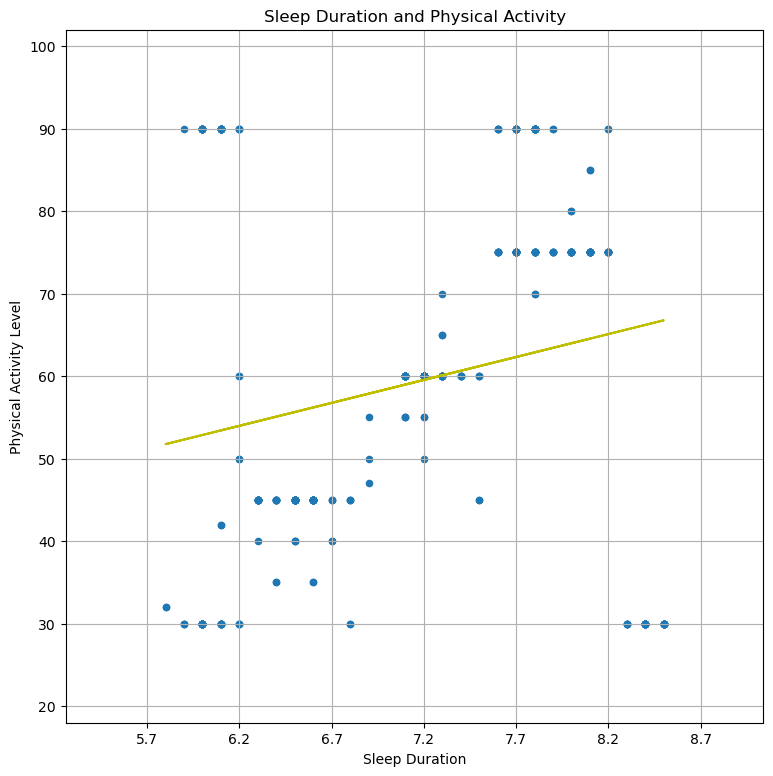

5.559729276558028


In [76]:
# create Sleep Duration and Physical Activity Level scatter plot 
sleep_data.plot(kind="scatter", x="Sleep Duration", y="Physical Activity Level", grid=True, figsize=(9,9),
              title="Sleep Duration and Physical Activity")
plt.xticks(np.arange(min(x_values - 3.3), max(x_values)+1.2, .5))

x_values = sleep_data['Sleep Duration']
y_values = sleep_data['Physical Activity Level']


slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"y-")


  #plt.xticks(np.arange(min(x), max(x)+1, .5))
# Pad margins so that markers don't get 
# clipped by the axes
plt.margins(0.2)
plt.savefig("images/activity_sleep_duration_scatter.png")
plt.show()
print(slope)
#change x values

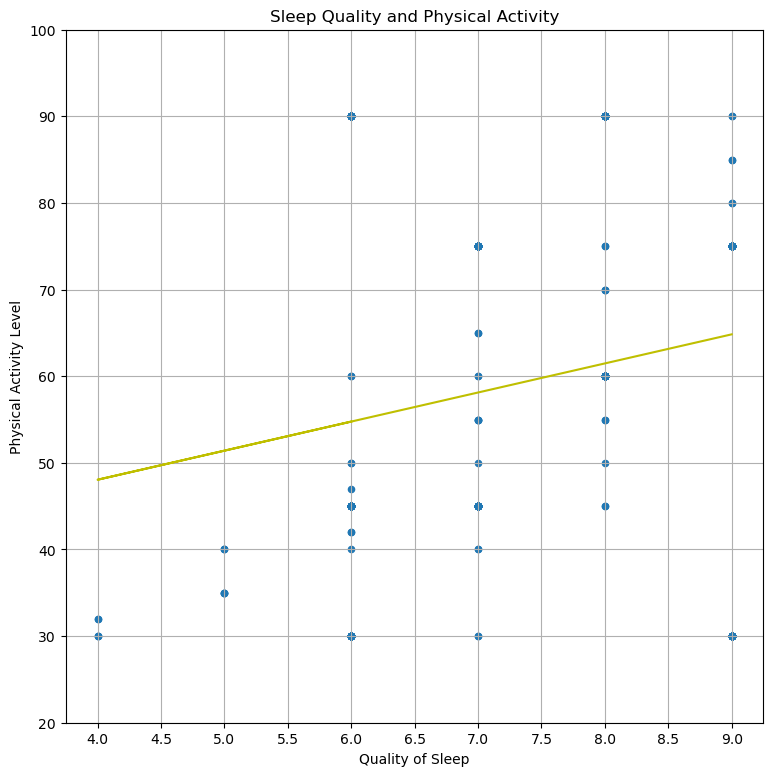

3.3570059790358404


In [77]:
# create Sleep Quality and Physical Activity Level scatter plot 
sleep_data.plot(kind="scatter", x="Quality of Sleep", y="Physical Activity Level", grid=True, figsize=(9,9),
              title="Sleep Quality and Physical Activity")

x_values = sleep_data['Quality of Sleep']
y_values = sleep_data['Physical Activity Level']

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"y-")
plt.xticks(np.arange(min(x_values), max(x_values)+.5, .5))
plt.yticks(np.arange(min(y_values)-10, max(y_values)+20, 10))
plt.savefig("images/activity_sleep_quality_scatter.png")
plt.show()
print(slope)
# change x values

In [11]:
# Create bar chart for gender and activity levels
per_gender_activity.plot(kind='bar', color="green", legend="Activity Levels", align="edge")

plt.title("Activity Levels Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Activity Level")
plt.legend(loc=3)
plt.show()

,Quality of Sleep
Gender,
Female,7.664865
Male,6.968254


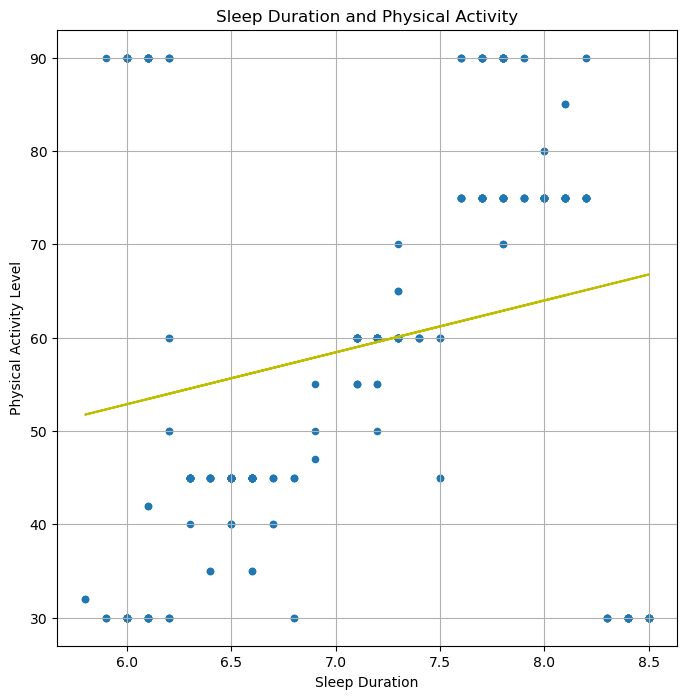

In [12]:
# bar chart for gender and average sleep duration
per_gender_duration.plot(kind='bar', color="red", legend="Sleep Duration", align="edge")

plt.title("Sleep Duration Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Sleep Duration")
plt.legend(loc=3)
plt.show()

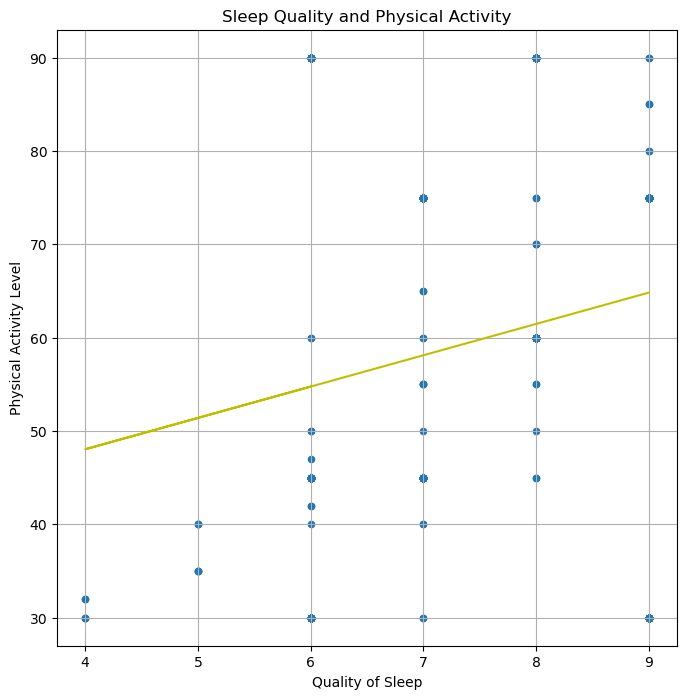

In [13]:
# bar chart for gender and average sleep duration
per_gender_duration.plot(kind='bar', color="blue", legend="Sleep Quality", align="edge")

plt.title("Sleep Quality Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Quality of Sleep")
plt.legend(loc=3)
plt.show()

In [ ]:
per_gender_duration.plot(kind='bar', color="orange", alpha=0.15, legend="Sleep Duration", align="center", width=0.2)

# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Sleep Duration per Gender")
plt.xlabel("Gender")
plt.ylabel("Sleep Duration")
plt.legend(loc=3)
plt.show()

In [ ]:
# box and whister plot
sleep_d = sleep_data['Sleep Duration']
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Duration')
ax1.set_ylabel('Sleep Duration')
ax1.boxplot(sleep_d)
plt.show()


In [ ]:
# box and whister plot
sleep_q = sleep_data['Quality of Sleep']
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Quality')
ax1.set_ylabel('Sleep Quality')

ax1.boxplot(sleep_q)
plt.show()

In [14]:
# Age Section

In [15]:
# Create bins
bins = [20, 29, 39, 49, 59]
age_labels = ["20s", "30s", "40s", "50s"]

In [16]:
# Slice the data and place it into bins
# Place the data series into a new column inside of the DataFrame
sleep_data["Age Range"] = pd.cut(sleep_data["Age"], bins, labels=age_labels)
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Range
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,20s
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,20s
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,20s
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,20s
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,20s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s


In [17]:
#calculate the mean of stress level by age group
age_stress = sleep_data.groupby(["Age Range"])["Stress Level"].mean()
age_stress

Age Range
20s    7.315789
30s    5.521127
40s    5.675214
50s    4.447917
Name: Stress Level, dtype: float64

In [18]:
#calculate the mean of sleep duration by age group
age_sleep_duration = sleep_data.groupby(["Age Range"])["Sleep Duration"].mean()
age_sleep_duration

Age Range
20s    6.468421
30s    7.066901
40s    6.909402
50s    7.631250
Name: Sleep Duration, dtype: float64

In [19]:
age_sleep_quality = sleep_data.groupby(["Age Range"])["Quality of Sleep"].mean()
age_sleep_quality

Age Range
20s    5.789474
30s    7.225352
40s    6.965812
50s    8.166667
Name: Quality of Sleep, dtype: float64

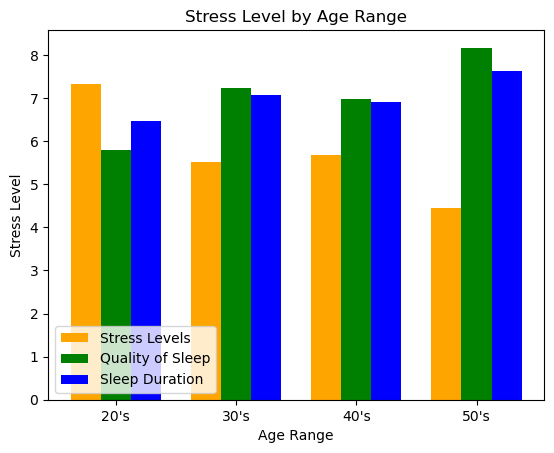

In [20]:
# Create Bar Graph with clustered data
n = 4
ind = np.arange(n)
width = 0.25

bar1 = plt.bar(ind, age_stress, width, color="orange")
bar2 = plt.bar(ind+width, age_sleep_quality, width, color="green")
bar3 = plt.bar(ind+width*2, age_sleep_duration, width, color="blue")

# Label The Graph
plt.xlabel("Age Range")
plt.ylabel('Stress Level')
plt.title("Stress Level by Age Range")
  
plt.xticks(ind+width,["20's", "30's", "40's", "50's"])
plt.legend( (bar1, bar2, bar3), ('Stress Levels', 'Quality of Sleep', 'Sleep Duration'), loc=3)
plt.savefig("images/age_bar.png")
plt.show()

In [21]:
# Create dfs for age ranges
twenties_df = sleep_data[sleep_data["Age Range"] == "20s"]
thirties_df = sleep_data[sleep_data["Age Range"] == "30s"]
forties_df = sleep_data[sleep_data["Age Range"] == "40s"]
fifties_df = sleep_data[sleep_data["Age Range"] == "50s"]

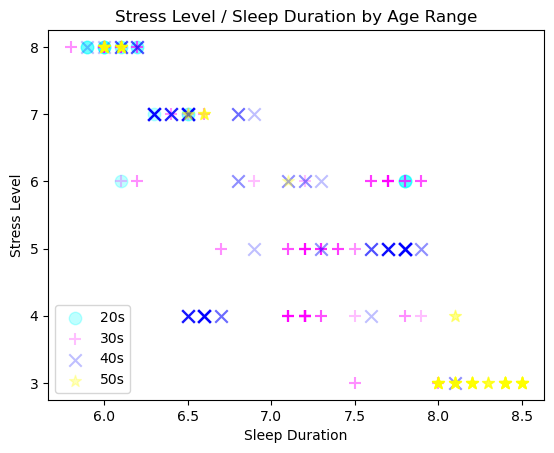

In [22]:
# Create scatter plot for stress x duration
# plot the sleep duration to stress level relationship for people in their 20s
x = twenties_df["Sleep Duration"]
y = twenties_df["Stress Level"]
plt.scatter(x, y, color="cyan", marker="o", s=80, alpha=0.25, label = "20s")

# plot the sleep duration to stress level relationship for people in their 30s
x = thirties_df["Sleep Duration"]
y = thirties_df["Stress Level"]
plt.scatter(x, y,color="magenta", marker="+", s=80, alpha=0.25, label = "30s")

# plot the sleep duration to stress level relationship for people in their 40s
x = forties_df["Sleep Duration"]
y = forties_df["Stress Level"]
plt.scatter(x, y, color="blue", marker="x", s=80, alpha=0.25, label = "40s")

# plot the sleep duration to stress level relationship for people in their 50s
x = fifties_df["Sleep Duration"]
y = fifties_df["Stress Level"]
plt.scatter(x, y, color="yellow", marker="*", s=80, alpha=0.25, label = "50s")


# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Stress Level / Sleep Duration by Age Range")
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.legend(loc=3)
plt.savefig("images/age_duration_scatter.png")
plt.show()

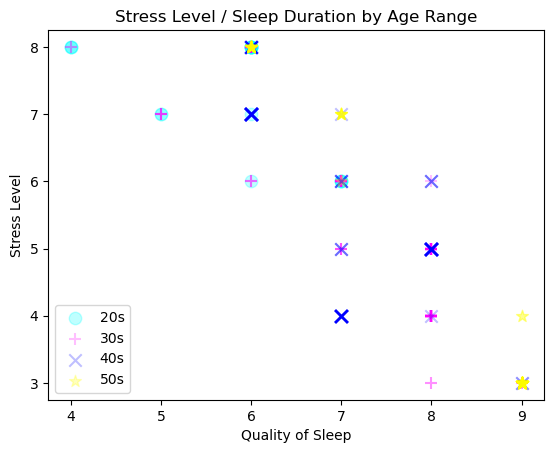

In [23]:
# Create scatter plot for stress x quality
# plot the sleep quality to stress level relationship for people in their 20s
x = twenties_df["Quality of Sleep"]
y = twenties_df["Stress Level"]
plt.scatter(x, y, color="cyan", marker="o", s=80, alpha=0.25, label = "20s")

# plot the sleep quality to stress level relationship for people in their 30s
x = thirties_df["Quality of Sleep"]
y = thirties_df["Stress Level"]
plt.scatter(x, y,color="magenta", marker="+", s=80, alpha=0.25, label = "30s")

# plot the sleep quality to stress level relationship for people in their 40s
x = forties_df["Quality of Sleep"]
y = forties_df["Stress Level"]
plt.scatter(x, y, color="blue", marker="x", s=80, alpha=0.25, label = "40s")

# plot the sleep quality to stress level relationship for people in their 50s
x = fifties_df["Quality of Sleep"]
y = fifties_df["Stress Level"]
plt.scatter(x, y, color="yellow", marker="*", s=80, alpha=0.25, label = "50s")


# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Stress Level / Sleep Duration by Age Range")
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.legend(loc=3)
plt.savefig("images/age_quality_scatter.png")
plt.show()

In [24]:
# Occupation Sleep Section

In [25]:
# On average are males or females getting better sleep? (lydia)
# How does gender correlate with occupation and average length of sleep?
# Group occupations
occupation_data = sleep_data.groupby(["Occupation"])["Sleep Duration"].mean()
occupation_data
# Generate graph 1
# Generate graph 2

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

In [26]:
# Group occupations
occupation = sleep_data["Occupation"].unique()
occupation

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [27]:
# How does gender correlate with occupation and average length of sleep?

occupation_data = sleep_data.groupby(["Occupation"])["Quality of Sleep"].mean()
occupation_data

Occupation
Accountant              7.891892
Doctor                  6.647887
Engineer                8.412698
Lawyer                  7.893617
Manager                 7.000000
Nurse                   7.369863
Sales Representative    4.000000
Salesperson             6.000000
Scientist               5.000000
Software Engineer       6.500000
Teacher                 6.975000
Name: Quality of Sleep, dtype: float64

In [28]:
# do a chart on which gender is more in the occupations?
gender = sleep_data.groupby(["Occupation"])['Gender'].count()
gender

Occupation
Accountant              37
Doctor                  71
Engineer                63
Lawyer                  47
Manager                  1
Nurse                   73
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Teacher                 40
Name: Gender, dtype: int64

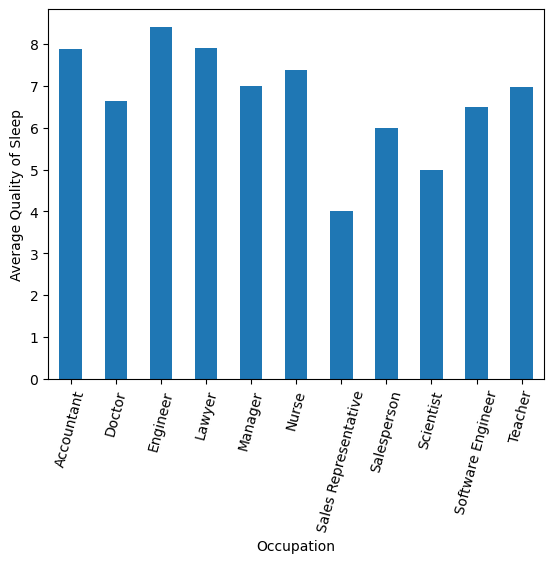

In [29]:
occupation_data.plot(kind='bar')
plt.xlabel("Occupation")
plt.ylabel("Average Quality of Sleep")
plt.xticks(rotation=75)
plt.savefig("images/BarChart_AvgSleepOccupation.png")
plt.show()

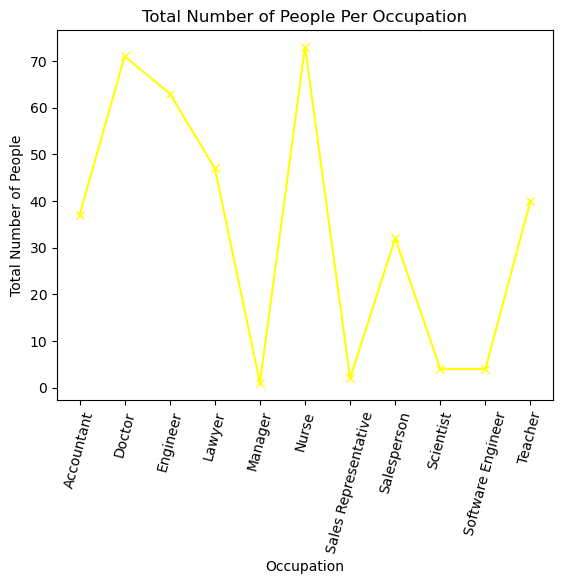

In [30]:
gender.plot(kind='line', marker ='x', color='yellow')
plt.title("Total Number of People Per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Number of People")
plt.xticks(rotation=75)
plt.xticks(np.arange(11), ["Accountant", "Doctor", "Engineer", "Lawyer","Manager", "Nurse", "Sales Representative", "Salesperson", "Scientist", "Software Engineer", "Teacher"])

plt.savefig("images/LineGraph_AvgSleepOccupation.png")
plt.show()

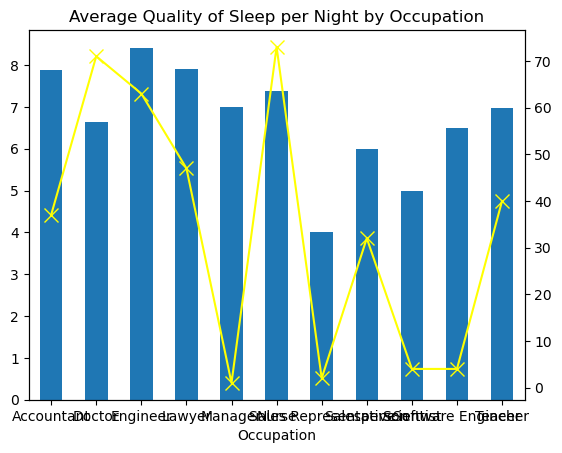

In [31]:
occupation_data.plot(kind='bar')
gender.plot(kind='line', secondary_y = True, marker ='x', color='yellow', ms=10)
plt.title("Average Quality of Sleep per Night by Occupation")
plt.xlabel("Occupation")
plt.xticks(rotation=75)

plt.savefig("images/BarChart_AvgSleepOccupation.png")
plt.show()

In [32]:
gender_sleep = sleep_data.groupby(["Gender"])["Quality of Sleep"].mean()
gender_sleep = np.round(gender_sleep, decimals = 0)
gender_sleep

Gender
Female    8.0
Male      7.0
Name: Quality of Sleep, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

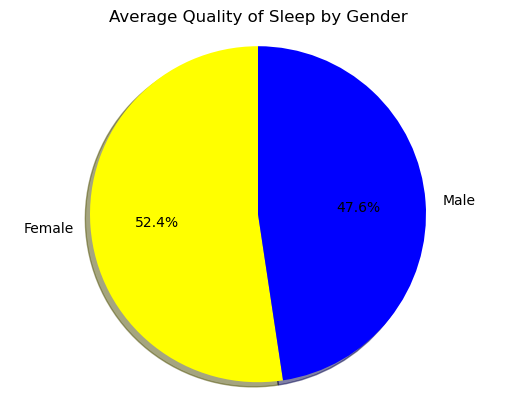

In [33]:
# On average are males or females getting better sleep? (lydia)
gender_sleep = sleep_data.groupby(["Gender"])["Quality of Sleep"].mean()
genders = ["Female", "Male"]
colors = ["yellow", "blue"]
plt.title("Average Quality of Sleep by Gender")
plt.pie(gender_sleep, labels=genders, autopct="%1.1f%%", colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("images/PieChart_AvgQualitySleepGender.png")
plt.show

In [34]:
#Mean, median, mode, min, max of quality of sleep - FIX THIS
mean_sleep_quality = sleep_data["Quality of Sleep"].mean()
median_sleep_quality = sleep_data["Quality of Sleep"].median()
mode_sleep_quality = sleep_data["Quality of Sleep"].mode()
min_sleep_quality = sleep_data["Quality of Sleep"].min()
max_sleep_quality = sleep_data["Quality of Sleep"].max()
mean_sleep_quality = np.round(mean_sleep_quality, decimals = 0)
print ("Average quality quality of sleep is ", mean_sleep_quality)
print("Median quality of sleep is ", median_sleep_quality)
print("Minimum quality of sleep is ", min_sleep_quality)
print("Maximum quality of sleep is ", max_sleep_quality)
print("Mode quality of sleep is ", mode_sleep_quality) 

Average quality quality of sleep is  7.0
Median quality of sleep is  7.0
Minimum quality of sleep is  4
Maximum quality of sleep is  9
Mode quality of sleep is  0    8
Name: Quality of Sleep, dtype: int64


In [35]:
# Occupation BMI Section

In [36]:
# Which career field has the most lean employees and what's the average BMI for employees?

In [37]:
sleep_data["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [38]:
Overweight_df = sleep_data[sleep_data["BMI Category"] == "Overweight"]
Normal_df = sleep_data[sleep_data["BMI Category"] == "Normal"]
Obese_df = sleep_data[sleep_data["BMI Category"] == "Obese"]
Normal_Weight_df = sleep_data[sleep_data["BMI Category"] == "Normal Weight"]

In [39]:
Overweight_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Range
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,20s
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,None,30s
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,None,30s
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,30s
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s


In [59]:
BMI_Category_Overweight = Overweight_df.groupby(["Occupation"])["BMI Category"].count()
overweight_per = BMI_Category_Overweight / gender

In [60]:
BMI_Category_Obese = Obese_df.groupby(["Occupation"])["BMI Category"].count()
obese_per = BMI_Category_Obese / gender

In [61]:
BMI_Category_Normal = Normal_df.groupby(["Occupation"])["BMI Category"].count()
normal_per = BMI_Category_Normal / gender

In [62]:
BMI_Category_Normal_Weight = Normal_Weight_df.groupby(["Occupation"])["BMI Category"].count()
normal_weight_per = BMI_Category_Normal_Weight / gender

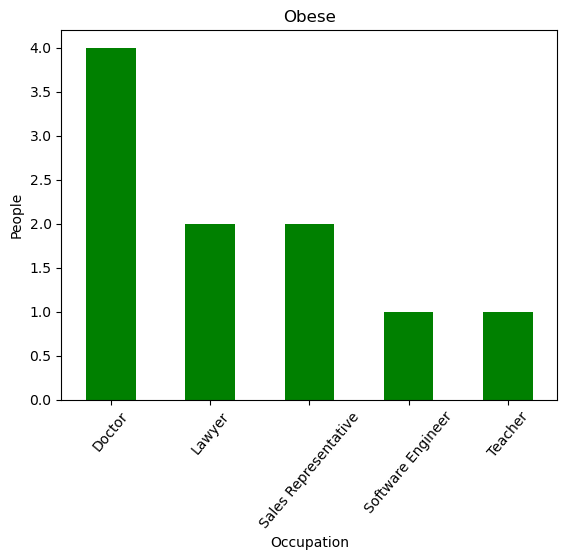

In [78]:
# Create bar chart for BMI Category and activity levels
BMI_Category_Obese.plot(kind='bar', color="green", align="center")
plt.title("Obese")
plt.xlabel("Occupation")
plt.ylabel("People")
plt.xticks(rotation=50)
plt.savefig("images/obese_bar.png")
plt.show()

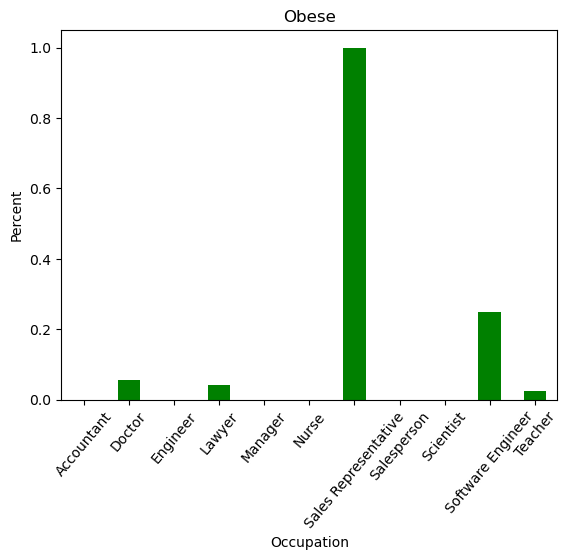

In [79]:
# Create bar chart for BMI Category and activity levels
obese_per.plot(kind='bar', color="green", align="center")
plt.title("Obese")
plt.xlabel("Occupation")
plt.ylabel("Percent")
plt.xticks(rotation=50)
plt.savefig("images/obese_per_bar.png")
plt.show()

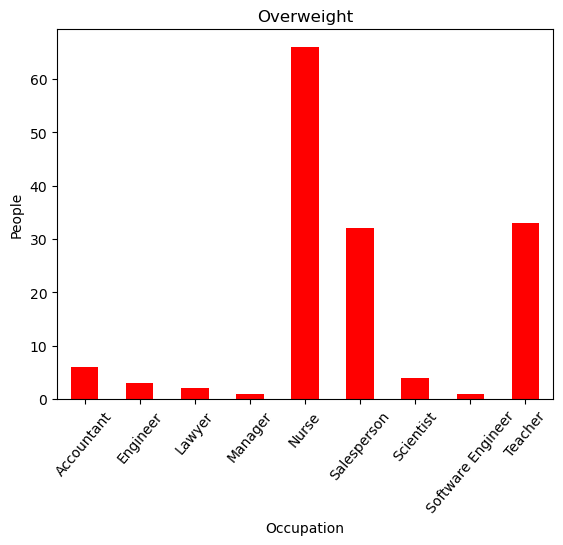

In [80]:
# Create bar chart for BMI Category and activity levels
BMI_Category_Overweight.plot(kind='bar', color="red", align="center")
plt.title("Overweight")
plt.xlabel("Occupation")
plt.ylabel("People")
plt.xticks(rotation=50)
plt.savefig("images/overweight_bar.png")
plt.show()

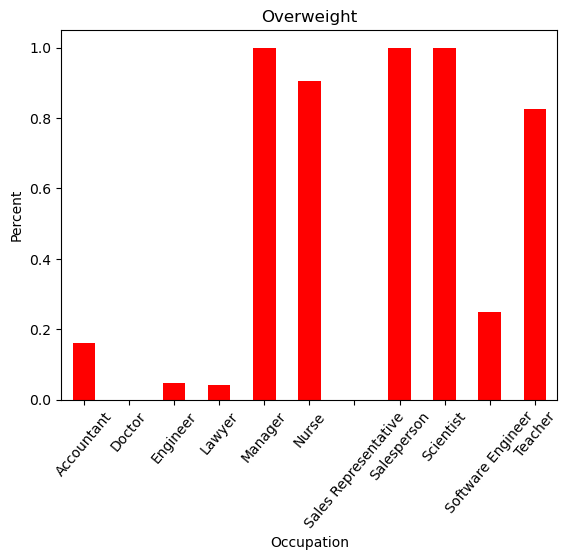

In [81]:
# Create bar chart for BMI Category and activity levels
overweight_per.plot(kind='bar', color="red", align="center")
plt.title("Overweight")
plt.xlabel("Occupation")
plt.ylabel("Percent")
plt.xticks(rotation=50)
plt.savefig("images/overweight_per_bar.png")
plt.show()

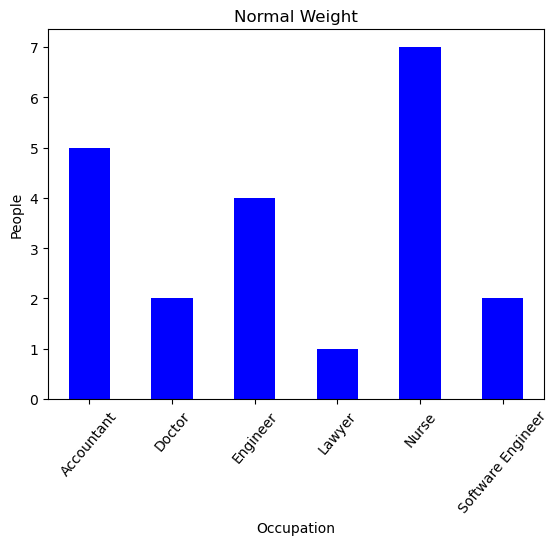

In [82]:
# Create bar chart for BMI Category and activity levels
BMI_Category_Normal_Weight.plot(kind='bar', color="blue", align="center")
plt.title("Normal Weight")
plt.xlabel("Occupation")
plt.ylabel("People")
plt.xticks(rotation=50)
plt.savefig("images/normal_weight_bar.png")
plt.show()

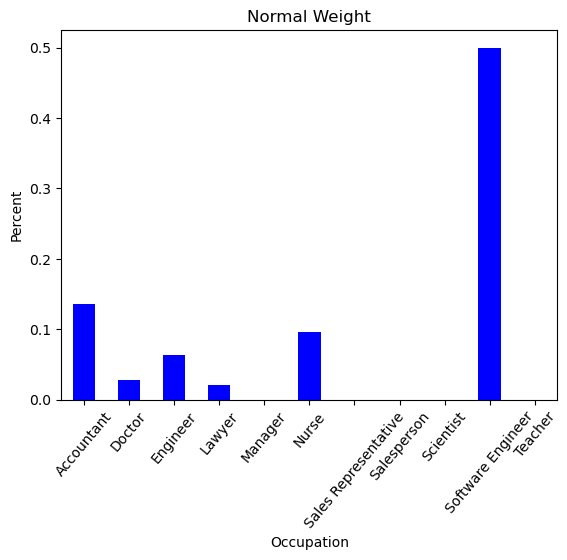

In [83]:
# Create bar chart for BMI Category and activity levels
normal_weight_per.plot(kind='bar', color="blue", align="center")
plt.title("Normal Weight")
plt.xlabel("Occupation")
plt.ylabel("Percent")
plt.xticks(rotation=50)
plt.savefig("images/normal_weight_per_bar.png")
plt.show()

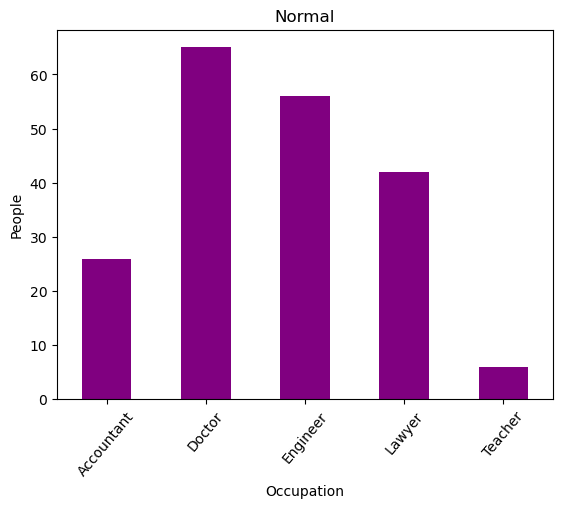

In [84]:
# Create bar chart for BMI Category and activity levels
BMI_Category_Normal.plot(kind='bar', color="purple", align="center")
plt.title("Normal")
plt.xlabel("Occupation")
plt.ylabel("People")
plt.xticks(rotation=50)
plt.savefig("images/normal_bar.png")
plt.show()

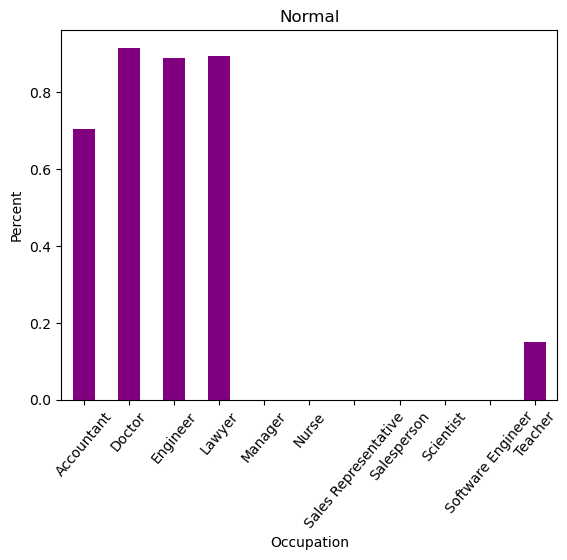

In [85]:
# Create bar chart for BMI Category and activity levels
normal_per.plot(kind='bar', color="purple", align="center")
plt.title("Normal")
plt.xlabel("Occupation")
plt.ylabel("Percent")
plt.xticks(rotation=50)
plt.savefig("images/normal_per_bar.png")
plt.show()